In [242]:
import pandas as pd
import numpy as np

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
%matplotlib inline

In [245]:
data_train = pd.read_csv("titanic_train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

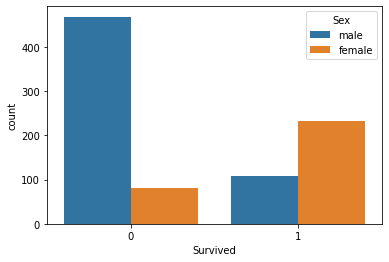

In [246]:
sns.countplot(data=data_train,x="Survived",hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

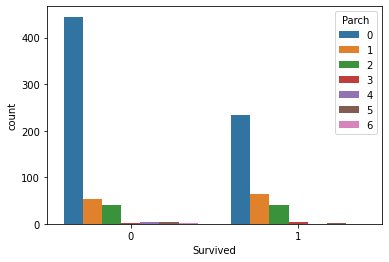

In [247]:
sns.countplot(data=data_train,x="Survived",hue="Parch")

<AxesSubplot:>

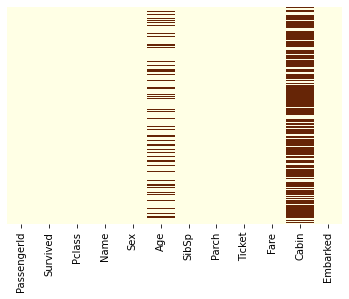

In [248]:
sns.heatmap(data=data_train.isnull(),yticklabels=False,cbar=False,cmap="YlOrBr")

In [249]:
def predictAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age    

<AxesSubplot:>

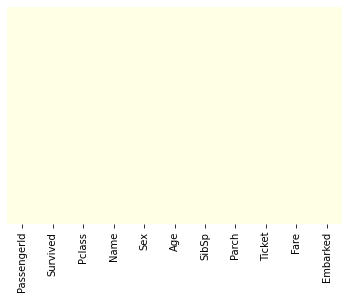

In [250]:
data_train["Age"] = data_train[["Age","Pclass"]].apply(predictAge,axis=1)
data_train = data_train.drop("Cabin",axis=1)
sns.heatmap(data=data_train.isnull(),yticklabels=False,cbar=False,cmap="YlOrBr")

In [251]:
sex = pd.get_dummies(data_train["Sex"],drop_first=True)
embark = pd.get_dummies(data_train["Embarked"],drop_first=True)


In [252]:
data_train = pd.concat([data_train,sex,embark],axis=1)


In [253]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [254]:
data_train.drop(["Sex","Embarked","Name","Ticket","PassengerId"],axis=1,inplace=True)

In [255]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [259]:
X = data_train[["Pclass","Age","SibSp","Parch","Fare","male","Q","S"]]
y = data_train["Survived"]

from sklearn.model_selection import train_test_split

X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3,random_state=101)

In [268]:
from sklearn.linear_model import LogisticRegression

log_regg_model = LogisticRegression()
log_regg_model.fit(X_train,y_train)


c:\users\tolga\desktop\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = log_regg_model.predict(X_test)

In [270]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       395
           1       0.73      0.75      0.74       228

    accuracy                           0.81       623
   macro avg       0.79      0.80      0.80       623
weighted avg       0.81      0.81      0.81       623



In [269]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)
 

array([[333,  62],
       [ 57, 171]], dtype=int64)

In [ ]:
sns.